In [ ]:
import pandas as pd
data  = pd.read_csv("StudentStatistics.csv",sep=";")
data

,RespNr,Location,OAA_ObjCourse,OAA_ObjClass,OAA_CourseExec,OAA_RelActObj,OAA_RelActExa,OAA_RelObjExa,OAA_LearProcAct,OAA_LearProcPrep,...,Mix_IntDiscus,Mix_IntPrep,Mix_IntExcel,Over_Grade,Gen_Gender,Gen_Age,Gen_SecSchool,Gen_Classes,Gen_NumberSubj,Gen_Time
0,1.0,Rotterdam,Fully Disagree,Fully Disagree,Fully Disagree,Disagree,Fully Disagree,Fully Disagree,Fully Disagree,Fully Disagree,...,Not at all,not so much,not so much,20.0,Female,22.0,NaN,NaN,Fully agree,20 < 30
1,2.0,Haarlem,Disagree,Disagree,NaN,Fully Disagree,Neither disagree nor agree,Agree,Disagree,Neither disagree nor agree,...,not so much,somewhat,somewhat,50.0,Male,NaN,The Netherlands,6.0,Disagree,10 < 20
2,3.0,Diemen,Fully agree,Fully agree,Agree,Fully agree,Fully agree,Fully agree,Fully agree,Agree,...,Very much,somewhat,somewhat,80.0,Male,37.0,Africa,7.0,Agree,10 < 20
3,4.0,Rotterdam,Fully Disagree,Neither disagree nor agree,Disagree,Neither disagree nor agree,Neither disagree nor agree,Fully Disagree,Fully Disagree,Neither disagree nor agree,...,NaN,neutral,neutral,15.0,Female,24.0,The Netherlands,6.0,Agree,10 < 20
4,5.0,Haarlem,Disagree,Agree,Fully Disagree,Neither disagree nor agree,Fully agree,Fully agree,Neither disagree nor agree,Fully agree,...,Not at all,somewhat,Very much,40.0,Male,19.0,The Netherlands,7.0,Fully agree,10 < 20
5,6.0,Diemen,Fully agree,Agree,Fully agree,Fully agree,Fully agree,Fully agree,Fully agree,Neither disagree nor agree,...,Very much,somewhat,somewhat,85.0,Male,25.0,NaN,6.0,Neither disagree nor agree,20 < 30
6,7.0,Rotterdam,Fully Disagree,Neither disagree nor agree,Fully Disagree,Neither disagree nor agree,Fully agree,Neither disagree nor agree,Neither disagree nor agree,Neither disagree nor agree,...,neutral,neutral,neutral,30.0,Female,NaN,Africa,NaN,NaN,NaN
7,8.0,Haarlem,Disagree,Disagree,Fully Disagree,Disagree,Neither disagree nor agree,Disagree,Fully Disagree,Neither disagree nor agree,...,not so much,not so much,not so much,45.0,Female,19.0,The Netherlands,6.0,Neither disagree nor agree,10 < 20
8,9.0,Diemen,Neither disagree nor agree,Agree,NaN,Fully agree,Fully agree,Neither disagree nor agree,Neither disagree nor agree,Disagree,...,NaN,NaN,NaN,70.0,Male,26.0,Asia,2.0,Disagree,10 < 20
9,10.0,Rotterdam,Agree,Agree,Disagree,Neither disagree nor agree,Agree,Agree,Neither disagree nor agree,Neither disagree nor agree,...,not so much,not so much,not so much,60.0,Male,19.0,Asia,4.0,Agree,Less than 10 hours


In [ ]:
data['Gen_Gender'].value_counts()

Gen_Gender
Male      34
Female    12
Name: count, dtype: int64

In [ ]:
data['Gen_SecSchool'].value_counts()

Gen_SecSchool
The Netherlands          24
Asia                      7
Africa                    5
Othern Western Europe     3
South America             1
North America             1
Eastern Europe            1
Name: count, dtype: int64

In [ ]:
data['Gen_SecSchool'][data['Gen_SecSchool']!='The Netherlands'] = 'Others'

In [ ]:
data['Gen_SecSchool'].value_counts()

Gen_SecSchool
Others             31
The Netherlands    24
Name: count, dtype: int64

In [ ]:
mycrosstable = pd.crosstab(data['Gen_Gender'],data['Gen_SecSchool'])
mycrosstable

Gen_SecSchool,Others,The Netherlands
Gen_Gender,,
Female,4,8
Male,18,16


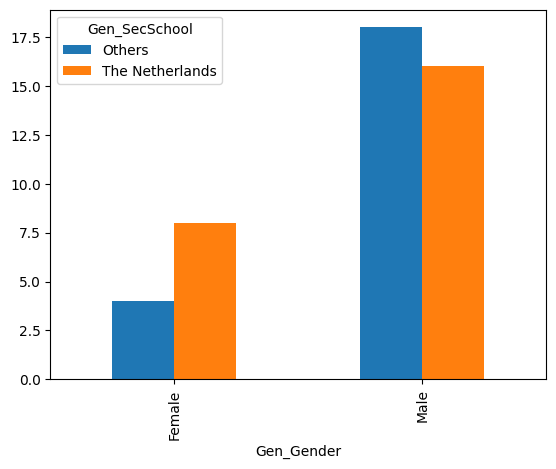

In [ ]:
import matplotlib.pyplot as plt
mycrosstable.plot(kind='bar')
plt.show()

In [ ]:
#FISHER EXACT TEST
'''
H0 - no influence of gender on secondary school location
Ha = influence of gender on secondary school location
'''
from scipy.stats import fisher_exact
fisher_exact(mycrosstable)

SignificanceResult(statistic=0.4444444444444444, pvalue=0.32137504230527486)

In [ ]:
pvalue=0.32137504230527486

#no evidence to reject the null hypothesis

In [ ]:
#ODDS RATIO
#we assumed here that pvalue is less than 0.05 to understand odds ratio.
a=mycrosstable.iloc[0,0]
b=mycrosstable.iloc[0,1]
c=mycrosstable.iloc[1,0]
d=mycrosstable.iloc[1,1]

OR = (a/c) / (b/d)
print(OR)
if OR < 1.49:
  print("negligible")
elif OR < 3.45:
  print("small")
elif OR < 9:
  print("medium")
else:
  print("large")

0.4444444444444444
negligible


Fisher exact test did not find an influence of gender on locaition of secondary school (pvalue = 0.32) and further the odds ratio effect size was negligible

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data=pd.read_csv("StudentStatistics.csv", sep=";")

In [ ]:
!pip install https://raw.githubusercontent.com/stikpet/stikpetP/main/stikpetP.tar.gz

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 253.6/253.6 kB 4.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for stikpetP: filename=stikpetP-0.0.3-py3-none-any.whl size=422074 sha256=5f1f28bd83d40c06656e266171dc10dbf981c48b7bf619570dede16bf636f3ea
  Stored in directory: /tmp/pip-ephem-wheel-cache-sbwa7kkp/wheels/65/58/9c/d9a9e2185c9bb20de121369a2b0f5452a2a582c4b4df87e446
Successfully built stikpetP


In [ ]:
pd.crosstab(data["Gen_Gender"], data["Mix_NrAct"])

Mix_NrAct,Enough,Far too little,Far too much,Too much,too little
Gen_Gender,,,,,
Female,8,1,0,0,2
Male,15,1,2,14,2


In [ ]:
data["Mix_NrAct"].value_counts().index

Index(['Enough', 'Too much', 'too little', 'Far too little', 'Far too much'], dtype='object', name='Mix_NrAct')

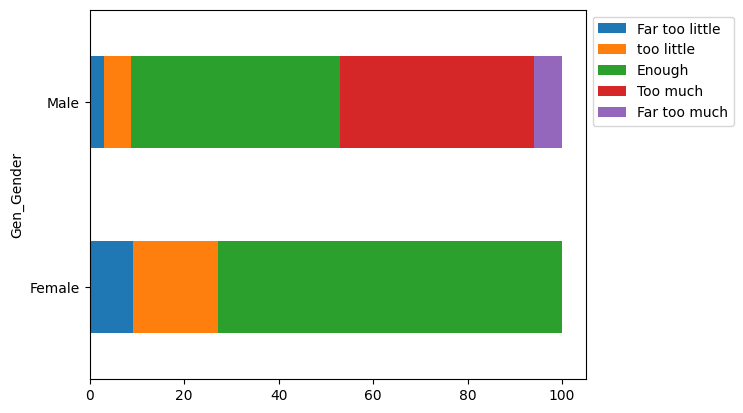

In [ ]:
import stikpetP as ps
cod={'Far too little':0,  'too little':1, 'Enough':2, 'Too much':3,  'Far too much':4}
ps.vi_bar_stacked_multiple(data["Gen_Gender"], data["Mix_NrAct"], cod)

In [ ]:
myOrd=data["Mix_NrAct"].replace(cod)
myBin1=data["Gen_Gender"]=="Male"
myBin2=data["Gen_Gender"]=="Female"

In [ ]:
myOrd1=myOrd[myBin1].dropna()
myOrd2=myOrd[myBin2].dropna()

In [ ]:
#mann-whiteny u test
from scipy.stats import mannwhitneyu
mannwhitneyu(myOrd1, myOrd2, alternative='two-sided', use_continuity=False)

MannwhitneyuResult(statistic=285.5, pvalue=0.0044363900107872375)

In [ ]:
pvalue=0.0044363900107872375
if pvalue<0.05:
  print("H0 is rejected, there is an association between gender and activities performed.")
else:
  print("H0 is not rejected, there is no association between gender and activities performed.")

H0 is rejected, there is an association between gender and activities performed.


In [ ]:
#Effect size - rosenthal correlation coefficient

from scipy.stats import norm
n=len(myOrd1)+len(myOrd2)
Z=norm.ppf(pvalue/2)
r=abs(Z/n**0.5)

if r < 0.2:
  print("very low")
elif r < 0.4:
  print("low")
elif r < 0.6:
  print("moderate")
elif r < 0.8:
  print("strong")
else:
  print("very strong")

moderate


In [ ]:
r

0.4241583947495162

The mann whitney U test found influence/association between gender and activities (pvalue = 0.0044), further the rosenthal correlation coefficient suggest that the strength of association as moderate (r=0.42).

In [ ]:
# Binary vs scale variables

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


#H0 = no association between gender and marks obtained in exam.
#Ha = there is an association between gender and marks obtained in exam.

data=pd.read_csv("StudentStatistics.csv", sep=";")

In [ ]:
data["Gen_Gender"]

,Gen_Gender
0,Female
1,Male
2,Male
3,Female
4,Male
5,Male
6,Female
7,Female
8,Male
9,Male


In [ ]:
data.groupby("Gen_Gender")["Over_Grade"].mean()

,Over_Grade
Gen_Gender,
Female,53.727273
Male,59.766667


In [ ]:
data.groupby("Gen_Gender")["Over_Grade"].std()

,Over_Grade
Gen_Gender,
Female,26.382157
Male,19.383042


In [ ]:
malesScores=data["Over_Grade"][data["Gen_Gender"]=="Male"].dropna()
femalesScores=data["Over_Grade"][data["Gen_Gender"]=="Female"].dropna()

(array([1., 1., 2., 1., 0., 2., 3., 0., 1.]),
 array([ 10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100.]),
 <BarContainer object of 9 artists>)

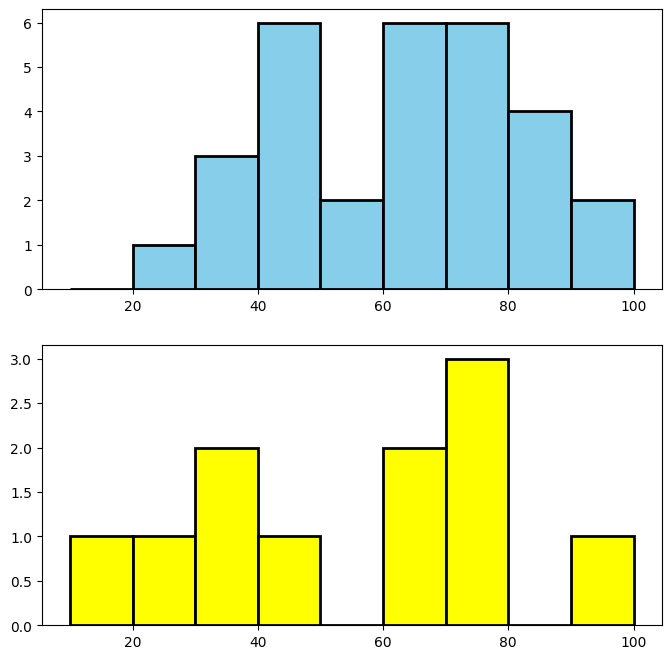

In [ ]:
plt.figure(1, figsize=(8,8))
plt.subplot(2,1,1)
plt.hist(malesScores, color="skyblue", lw=2, edgecolor="black", bins=[10,20,30,40,50,60,70,80,90,100])
plt.subplot(2,1,2)
plt.hist(femalesScores, color="yellow", lw=2, edgecolor="black",bins=[10,20,30,40,50,60,70,80,90,100])

In [ ]:
#welch t-test
from scipy.stats import ttest_ind
#student t-test
print(ttest_ind(malesScores, femalesScores))

#Welch test
print(ttest_ind(malesScores, femalesScores, equal_var=False))

TtestResult(statistic=0.8007631996644367, pvalue=0.428120221815538, df=39.0)
TtestResult(statistic=0.6936894455945684, pvalue=0.4991001245520197, df=14.158919197596669)


In [ ]:
pvalue=0.4991001245520197
if pvalue<0.05:
  print("H0 is rejected.")
else:
  print("H0 is accepted.")

H0 is accepted.


In [ ]:
#Effect size - cohen's d

!pip install https://raw.githubusercontent.com/stikpet/stikpetP/main/stikpetP.tar.gz

import stikpetP as ps

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 252.6/252.6 kB 1.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for stikpetP: filename=stikpetP-0.0.3-py3-none-any.whl size=420536 sha256=f960116032546206e1cfd7e112f68c75993afdfbe24b3f457e96f48bd3e129f7
  Stored in directory: /tmp/pip-ephem-wheel-cache-953qs_0b/wheels/65/58/9c/d9a9e2185c9bb20de121369a2b0f5452a2a582c4b4df87e446
Successfully built stikpetP


In [ ]:
ps.es_hedges_g_is(data['Gen_Gender'], data['Over_Grade'])

,g,version
0,0.282253,Cohen ds (Hedges g (uncorrected)


In [ ]:
d_s=0.282253

if d_s<0.1:
  print("negligible")
elif d_s<0.2:
  print("very small")
elif d_s<0.5:
  print("small")
elif d_s<0.8:
  print("medium")
elif d_s<1.2:
  print("large")
elif d_s<2:
  print("very large")
else:
  print("huge")

small


Welch t test applied on the data did not find evidence to reject the hypothesis that there is no association between gender and marks obtained(p=0.49)


In [ ]:
# Nominal data

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import stikpetP as ps
data=pd.read_csv("GSS2012a.csv")
datavis=pd.crosstab(data["mar1"], data["life"])

<ipython-input-19-78d36abd0a27>:8: DtypeWarning: Columns (11,115,123,187,274,284,287,288,290,291,292,397,585,595,628,632) have mixed types. Specify dtype option on import or set low_memory=False.
  data=pd.read_csv("GSS2012a.csv")


In [ ]:
datavis

life,DULL,EXCITING,ROUTINE
mar1,,,
DIVORCED,10,111,79
MARRIED,20,354,269
NEVER MARRIED,14,134,115
SEPARATED,3,22,32
WIDOWED,14,39,55


<Axes: xlabel='mar1'>

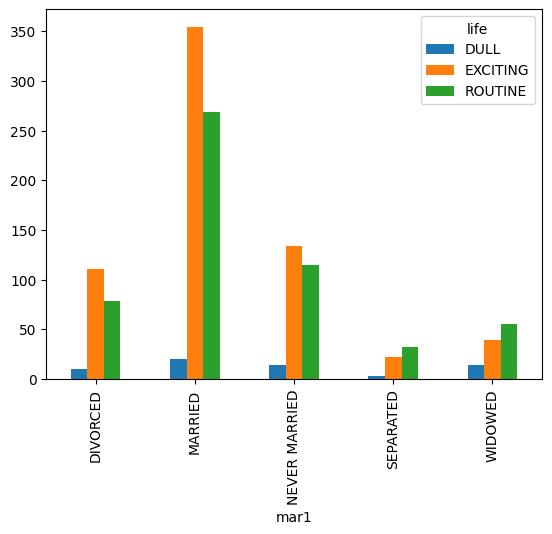

In [ ]:
datavis.plot(kind='bar')

In [ ]:
#pearson chi-square test
#H0 - no association between martial status and feeling of life
#Ha - association found between martial status and feeling of life

from scipy.stats import chi2_contingency
chi2_contingency(datavis)

Chi2ContingencyResult(statistic=32.535800204049536, pvalue=7.464877390427598e-05, dof=8, expected_freq=array([[  9.59874115, 103.8552321 ,  86.54602675],
       [ 30.85995279, 333.8945712 , 278.245476  ],
       [ 12.62234461, 136.56963021, 113.80802518],
       [  2.73564123,  29.59874115,  24.66561762],
       [  5.18332022,  56.08182533,  46.73485445]]))

In [ ]:
pvalue=7.464877390427598e-05

if pvalue<0.05:
  print("H0 is rejected. Association found between martial status and feeling of life")
else:
  print("H0 is accepted.")

H0 is rejected. Association found between martial status and feeling of life


In [ ]:
#Cramer V effect size

chi2table=ps.ts_pearson_ind(data['mar1'], data['life'])
chi2table

,n,n rows,n col.,statistic,df,p-value,min. exp.,prop. exp. below 5,test
0,1271.0,5,3,32.5358,8,0.000075,2.735641,0.066667,Pearson chi-square test of independence


In [ ]:
n=chi2table['n'][0]
rows=chi2table['n rows'][0]
cols=chi2table['n col.'][0]
stat=chi2table['statistic'][0]

V = ps.es_cramer_v_ind(stat, n, rows, cols)

In [ ]:
#df=3-1

df=min(rows, cols)-1
df

2

In [ ]:
if df==1:
  if V<0.10:
    a='negligible'
  elif V<0.30:
    a='small'
  elif V<0.50:
    a='medium'
  else:
    a='large'
elif df==2:
  if V<0.07:
    a='negligible'
  elif V<0.21:
    a='small'
  elif V<0.35:
    a='medium'
  else:
    a='large'
elif df==3:
  if V<0.06:
    a='negligible'
  elif V<0.17:
    a='small'
  elif V<0.29:
    a='medium'
  else:
    a='large'
elif df==4:
  if V<0.05:
    a='negligible'
  elif V<0.15:
    a='small'
  elif V<0.25:
    a='medium'
  else:
    a='large'
else:
  if V<0.05:
    a='negligible'
  elif V<0.13:
    a='small'
  elif V<0.23:
    a='medium'
  else:
    a='large'
a

'small'

Null hypothesis is rejected and effect size is small.
The pearson chi-square test of independence found as association between marital status and feeling of life (p<0.05) and further the cramer V effect size suggest the strength of association is small.


In [ ]:
# nominal vs  ordinal data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data=pd.read_csv("StudentStatistics.csv", sep=";")

In [ ]:
pd.crosstab(data["Location"], data["Mix_NrAct"])

Mix_NrAct,Enough,Far too little,Far too much,Too much,too little
Location,,,,,
Diemen,8,1,2,6,0
Haarlem,12,1,0,4,2
Rotterdam,7,0,0,5,3


In [ ]:
data['Mix_NrAct'].value_counts().index

Index(['Enough', 'Too much', 'too little', 'Far too little', 'Far too much'], dtype='object', name='Mix_NrAct')

In [ ]:
code={'Far too little':0,
      'too little':1,
    'Enough':2,
      'Too much':3,
      'Far too much':4}
!pip install https://raw.githubusercontent.com/stikpet/stikpetP/main/stikpetP.tar.gz
import stikpetP as ps


  Using cached https://raw.githubusercontent.com/stikpet/stikpetP/main/stikpetP.tar.gz (252 kB)
  Preparing metadata (setup.py) ... done


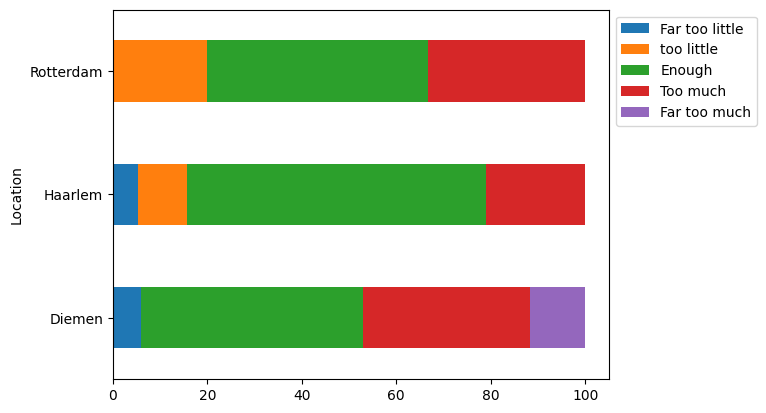

In [ ]:
ps.vi_bar_stacked_multiple(data["Location"], data["Mix_NrAct"], code)

In [ ]:
#kruskal-wallis h test
from scipy.stats import kruskal

rotterdamScores=data['Mix_NrAct'][data['Location']=="Rotterdam"].dropna()
diemenScores=data['Mix_NrAct'][data['Location']=="Diemen"].dropna()
haarlemScores=data['Mix_NrAct'][data['Location']=="Haarlem"].dropna()

In [ ]:
rotterdamScores=rotterdamScores.replace(code)
diemenScores=diemenScores.replace(code)
haarlemScores=haarlemScores.replace(code)

In [ ]:
kruskal(rotterdamScores, diemenScores, haarlemScores)

KruskalResult(statistic=3.335068971240797, pvalue=0.1887117641109804)

In [ ]:
pvalue=0.1887117641109804
if pvalue<0.05:
  print("H0 is rejected. There is an association between location and activities performed.")
else:
  print("H0 is accepted. There is no assciation between the location and perception of activities.")

H0 is accepted. There is no assciation between the location and perception of activities.


In [ ]:
#Effect size - epsilon square
#X = nominal data - place of school
#Y - ordinal data - perception of activities.

H=3.335068971240797
n=pd.crosstab(data['Location'], data['Mix_NrAct']).sum().sum()
print(H, n)
esq=H*((n+1)/(n**2 - 1))
esq

3.335068971240797 51


0.06670137942481594

In [ ]:
if esq<0.01:
  print('negligible')
elif esq<0.04:
  print('weak')
elif esq<0.16:
  print('moderate')
elif esq<0.36:
  print('relatively strong')
elif esq<0.64:
  print('strong')
else:
  print('very strong')

moderate


The kruskal wallis H test did not find an association/influence/impact of location and feeling of the activities (p=0.18).

Further the epsilon square effect was moderate (esq=0.066) {calculated for theory only, not needed here.}

In [ ]:
# nominal and scale variables

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
data=pd.read_csv("StudentStatistics.csv", sep=";")


In [ ]:
data['Location'].value_counts()

,count
Location,
Haarlem,22
Diemen,17
Rotterdam,16


In [ ]:
data['Over_Grade'].value_counts()

,count
Over_Grade,
40.0,6
70.0,6
80.0,4
65.0,4
60.0,3
50.0,3
20.0,2
90.0,2
98.0,2


In [ ]:
data.groupby('Location')['Over_Grade'].agg(['mean', 'median','std','min','max'])

,mean,median,std,min,max
Location,,,,,
Diemen,74.625000,70.0,14.536735,40.0,100.0
Haarlem,51.947368,45.0,19.432143,20.0,90.0
Rotterdam,47.153846,50.0,26.807481,10.0,98.0


In [ ]:
rotterdamScores=data['Over_Grade'][data['Location']=="Rotterdam"].dropna()
diemenScores=data['Over_Grade'][data['Location']=="Diemen"].dropna()
haarlemScores=data['Over_Grade'][data['Location']=="Haarlem"].dropna()

<function matplotlib.pyplot.show(close=None, block=None)>

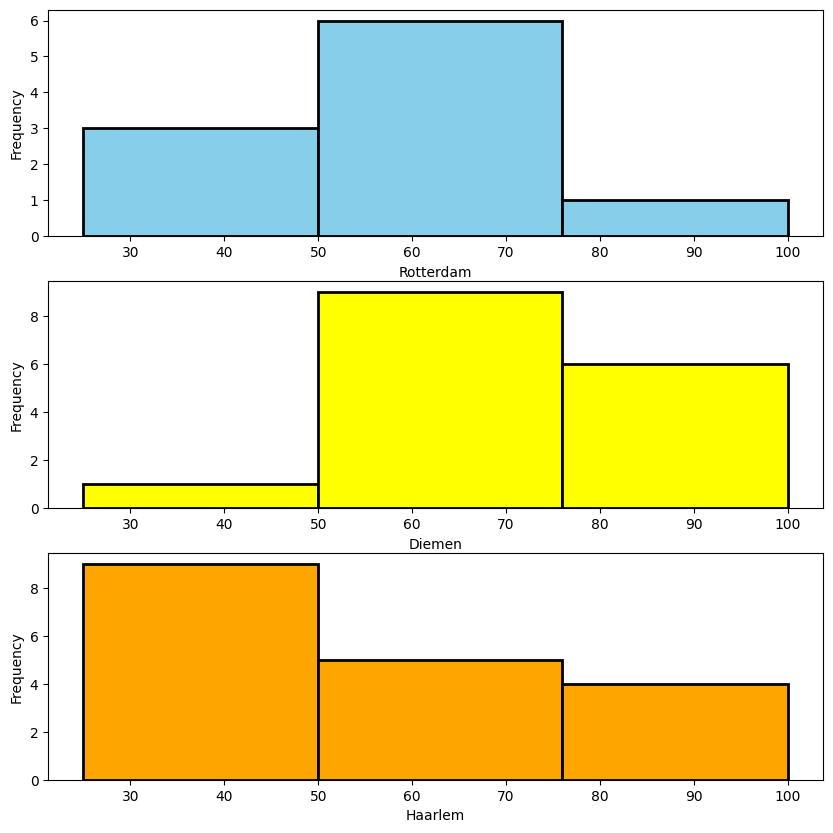

In [ ]:
plt.figure(1, figsize=(10,10))

plt.subplot(3,1,1)
plt.hist(rotterdamScores, color="skyblue", lw=2, edgecolor="black", bins=[25, 50, 76, 100])
plt.xlabel('Rotterdam')
plt.ylabel('Frequency')

plt.subplot(3,1,2)
plt.hist(diemenScores, color="yellow", lw=2, edgecolor="black", bins=[25, 50, 76, 100])
plt.xlabel('Diemen')
plt.ylabel('Frequency')

plt.subplot(3,1,3)
plt.hist(haarlemScores, color="orange", lw=2, edgecolor="black", bins=[25, 50, 76, 100])
plt.xlabel('Haarlem')
plt.ylabel('Frequency')

plt.show

In [ ]:
#Welch ANOVA or one-way ANOVA
#analysis of variance

#H0 = location has no influence on marks
#Ha = location has influence on marks

!pip install pingouin
import pingouin as pg


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 198.9/198.9 kB 3.4 MB/s eta 0:00:00


In [ ]:
pg.welch_anova(dv='Over_Grade', between='Location', data=data)

,Source,ddof1,ddof2,F,p-unc,np2
0,Location,2,26.071911,10.195117,0.000536,0.263336


In [ ]:
pvalue=0.000536
if pvalue<0.05:
  print("H0 is rejected. Location has influence on marks.")
else:
  print("H0 is accepted. Location has no influence on marks.")

H0 is rejected. Location has influence on marks.


In [ ]:
#effect size - ea squared

eta=0.263336
if eta<0.01:
  print('negligible')
elif eta<0.06:
  print('small')
elif eta<0.14:
  print('medium')
else:
  print('large')

large


Welch ANOVA has found a influence of location on marks obtained (pvalue=0.000536) and further the influence is large influence (eta=0.26)

In [ ]:
# ordinal variables.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
data=pd.read_csv("StudentStatistics.csv", sep=";")


In [ ]:
data['Teach_Motivate'].value_counts()

,count
Teach_Motivate,
Fully Disagree,20
Neither disagree nor agree,12
Disagree,9
Agree,7
Fully agree,6


In [ ]:
data['Teach_LinkTheory'].value_counts()

,count
Teach_LinkTheory,
Neither disagree nor agree,16
Disagree,12
Fully Disagree,11
Agree,8
Fully agree,7


In [ ]:
dataviz=pd.crosstab(data['Teach_Motivate'], data['Teach_LinkTheory'])
dataviz

Teach_LinkTheory,Agree,Disagree,Fully Disagree,Fully agree,Neither disagree nor agree
Teach_Motivate,,,,,
Agree,4,0,0,0,3
Disagree,1,5,1,0,2
Fully Disagree,0,7,10,0,3
Fully agree,1,0,0,5,0
Neither disagree nor agree,2,0,0,2,8


<Axes: xlabel='Teach_Motivate'>

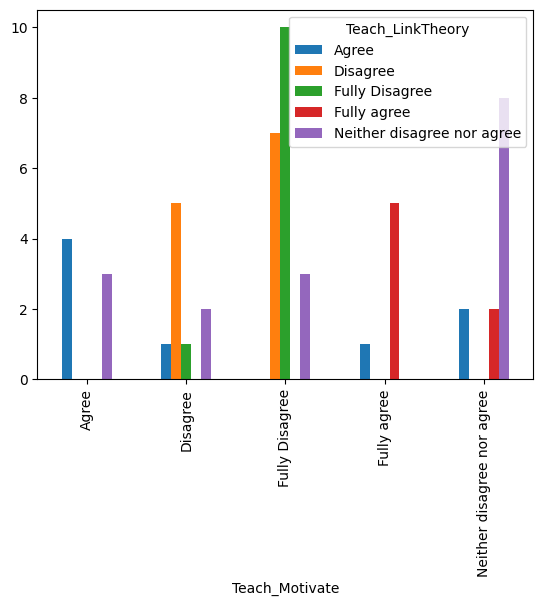

In [ ]:

dataviz.plot(kind='bar')

In [ ]:
#Goodman kruskal gamma

# H0 - no relation between the teach_motivate and the teach_linktheory
# Ha = relation between the teach_motivate and the teach_linktheory

#effect size - gamma

from scipy.stats import norm

def goodmanKruskalgamma(data, ordinal1, ordinal2, orderLabels1, orderLabels2=None):
    myCrosstable = pd.crosstab(data[ordinal1], data[ordinal2])

    myCrosstable = myCrosstable.reindex(orderLabels1)

    if orderLabels2 == None:
        myCrosstable = myCrosstable[orderLabels1]
    else:
        myCrosstable = myCrosstable[orderLabels2]

    nRows = myCrosstable.shape[0]
    nCols = myCrosstable.shape[1]


    C = [[0 for x in range(nCols)] for y in range(nRows)]

    # top left part
    for i in range(nRows):
        for j in range(nCols):
            h = i-1
            k = j-1
            if h>=0 and k>=0:
                for p in range(h+1):
                    for q in range(k+1):
                        C[i][j] = C[i][j] + list(myCrosstable.iloc[p])[q]

    # bottom right part
    for i in range(nRows):
        for j in range(nCols):
            h = i+1
            k = j+1
            if h<nRows and k<nCols:
                for p in range(h, nRows):
                    for q in range(k, nCols):
                        C[i][j] = C[i][j] + list(myCrosstable.iloc[p])[q]

    D = [[0 for x in range(nCols)] for y in range(nRows)]

    # bottom left part
    for i in range(nRows):
        for j in range(nCols):
            h = i+1
            k = j-1
            if h<nRows and k>=0:
                for p in range(h, nRows):
                    for q in range(k+1):
                        D[i][j] = D[i][j] + list(myCrosstable.iloc[p])[q]

    # top right part
    for i in range(nRows):
        for j in range(nCols):
            h = i-1
            k = j+1
            if h>=0 and k<nCols:
                for p in range(h+1):
                    for q in range(k, nCols):
                        D[i][j] = D[i][j] + list(myCrosstable.iloc[p])[q]

    P = 0
    Q = 0
    for i in range(nRows):
        for j in range(nCols):
            P = P + C[i][j] * list(myCrosstable.iloc[i])[j]
            Q = Q + D[i][j] * list(myCrosstable.iloc[i])[j]

    GKgamma = (P - Q) / (P + Q)

    if abs(GKgamma) < .10:
        qual = 'Negligible'
    elif abs(GKgamma) < .20:
        qual = 'Weak'
    elif abs(GKgamma) < .40:
        qual = 'Moderate'
    elif abs(GKgamma) < .60:
        qual = 'Relatively strong'
    elif abs(GKgamma) < .80:
        qual = 'Strong'
    else:
        qual = 'Very strong'

    n = myCrosstable.sum().sum()

    Z1 = GKgamma * ((P + Q) / (n * (1 - GKgamma**2)))**0.5

    forASE0 = 0
    forASE1 = 0
    for i in range(nRows):
        for j in range(nCols):
            forASE0 = forASE0 + list(myCrosstable.iloc[i])[j] * (Q * C[i][j] - P * D[i][j])**2
            forASE1 = forASE1 + list(myCrosstable.iloc[i])[j] * (C[i][j] - D[i][j])**2

    ASE0 = 4 * (forASE0)**0.5 / (P + Q)**2
    ASE1 = 2 * (forASE1 - (P - Q)**2 / n)**0.5 / (P + Q)
    Z2 = GKgamma / ASE0
    Z3 = GKgamma / ASE1

    p1 = norm.sf(Z1)
    p2 = norm.sf(Z2)
    p3 = norm.sf(Z3)

    zvalues = [Z1] + [Z2] + [Z3]
    pvalues = [p1] + [p2] + [p3]

    return (GKgamma,qual), zvalues, pvalues

In [ ]:
data['Teach_Motivate'].unique()

array(['Fully Disagree', 'Disagree', 'Fully agree',
       'Neither disagree nor agree', nan, 'Agree'], dtype=object)

In [ ]:
data['Teach_LinkTheory'].unique()

array(['Fully Disagree', 'Disagree', 'Fully agree',
       'Neither disagree nor agree', 'Agree', nan], dtype=object)

In [ ]:
var1 = ['Fully Disagree', 'Disagree', 'Neither disagree nor agree', 'Agree', 'Fully agree']
var2 = ['Fully Disagree', 'Disagree', 'Neither disagree nor agree', 'Agree', 'Fully agree']
goodmanKruskalgamma(data, 'Teach_Motivate', 'Teach_LinkTheory', var1, var2)

((0.8768577494692145, 'Very strong'),
 [10.773417534483025, 20.604715459769057, 13.303495586919903],
 [2.2980867366283263e-27, 1.2448922299482576e-94, 1.104473066321668e-40])

In [ ]:
#0.8768577494692145, 'Very strong'

pvalue=1.104473066321668e-40
if pvalue<0.05:
  print("H0 is rejected. There is an association between teach_motivate and teach_linktheory.")
else:
  print("H0 is accepted. There is no association between teach_motivate and teach_linktheory.")

H0 is rejected. There is an association between teach_motivate and teach_linktheory.


'Teach_Motivate' has an impact on 'Teach_LinkTheory' as per the result of goodman kruskal gamma test (pvalue < 0.05) and further the impact is very strong (gamma = 0.87)

In [ ]:
#ordinal and scale variables

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
data=pd.read_csv("StudentStatistics.csv", sep=";")



In [ ]:
data.groupby('Teach_Motivate')['Over_Grade'].agg(['mean', 'median','std','min','max'])

,mean,median,std,min,max
Teach_Motivate,,,,,
Agree,78.000000,75.0,12.179217,65.0,98.0
Disagree,52.777778,50.0,18.219343,20.0,80.0
Fully Disagree,36.812500,38.0,14.725120,10.0,65.0
Fully agree,84.600000,85.0,10.526158,70.0,98.0
Neither disagree nor agree,69.181818,70.0,16.898628,30.0,100.0


<Axes: xlabel='Over_Grade', ylabel='Count'>

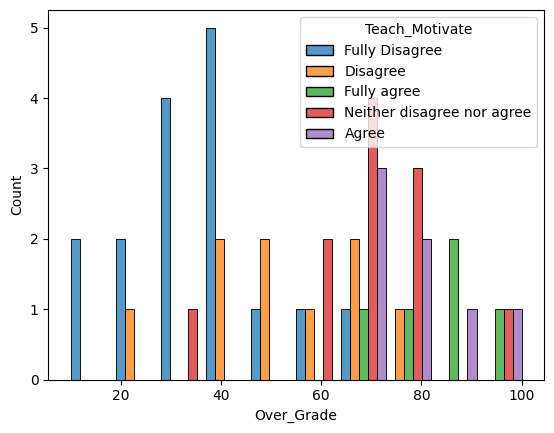

In [ ]:
import seaborn as sns
#sns.histplot(x='Over_Grade', hue='Teach_Motivate', data=data, bins=10,multiple="fill" )
#sns.histplot(x='Over_Grade', hue='Teach_Motivate', data=data, bins=10,multiple="stack" )
#sns.histplot(x='Over_Grade', hue='Teach_Motivate', data=data, bins=10,multiple="layer" )
sns.histplot(x='Over_Grade', hue='Teach_Motivate', data=data, bins=10,multiple="dodge" )

<Axes: xlabel='Teach_Motivate', ylabel='Over_Grade'>

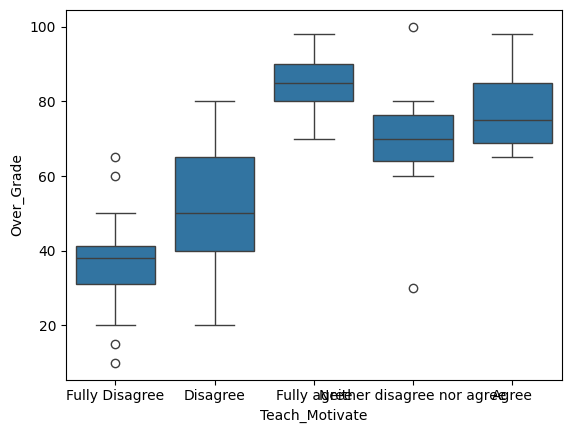

In [ ]:
sns.boxplot(x='Teach_Motivate',y='Over_Grade', data=data)

In [ ]:
data['Teach_Motivate'].unique()


array(['Fully Disagree', 'Disagree', 'Fully agree',
       'Neither disagree nor agree', nan, 'Agree'], dtype=object)

In [ ]:
coding={'Fully Disagree':0,
        'Disagree':1,
        'Neither disagree nor agree':2,
        'Agree':3,
        'Fully agree':4}

In [ ]:
mydata=data[['Teach_Motivate', 'Over_Grade']]
mydata['Teach_Motivate']=mydata['Teach_Motivate'].replace(coding)

<ipython-input-16-377207e37310>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mydata['Teach_Motivate']=mydata['Teach_Motivate'].replace(coding)


In [ ]:
mydata.corr(method='spearman') #-1 to 1
#0 = no relation

,Teach_Motivate,Over_Grade
Teach_Motivate,1.0000,0.7872
Over_Grade,0.7872,1.0000


Spearman rho varies between -1 to 1. if it is -1 there is a perfect negative monotonic relationship. if it is 0 there is no monotonic relationship and at 1 there is perfect positive monotonic relationship. monotonic means that it is constantly increasing or decreasing. a positive relation means that if one variable goes up, the other also goes up, a negative relation indicates if one goes down, the other goes up.

H0 - no relation between motivation and marks.
Ha - there is a relation.

In [ ]:
#spearman test
from scipy.stats import spearmanr

spearmanr(mydata, nan_policy="omit")

SignificanceResult(statistic=0.7871998951252405, pvalue=3.236363793284169e-11)

In [ ]:
pvalue=3.236363793284169e-11
statistic=0.7871998951252405

In [ ]:
rho=abs(statistic)
if rho<0.1:
  print('negligible')
elif rho<0.2:
  print('weak')
elif rho<0.4:
  print('moderate')
elif rho<0.6:
  print('relatively strong')
elif rho<0.8:
  print('strong')
else:
  print('very strong')

strong


'Teach_Motivate' has a strong positive impact over 'Over_Grade' (rho=0.7871998951252405), p<0.05.

In [ ]:
# two scale variables
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
data=pd.read_csv("StudentStatistics.csv", sep=";")

In [ ]:
data[['Gen_Age','Over_Grade']].describe()

,Gen_Age,Over_Grade
count,44.000000,48.000000
mean,24.454545,58.208333
std,15.144965,23.171845
min,18.000000,10.000000
25%,19.000000,40.000000
50%,21.000000,64.000000
75%,24.250000,75.000000
max,119.000000,100.000000


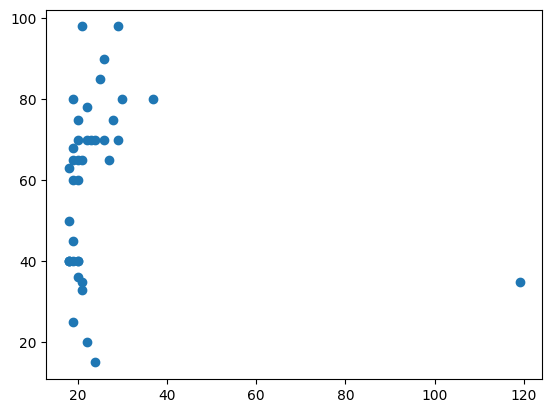

In [ ]:
plt.scatter(data['Gen_Age'], data['Over_Grade'])
plt.show()

In [ ]:
#pearson correlation test
newdf=data[['Gen_Age','Over_Grade']].dropna()
from scipy.stats import pearsonr
pearsonr(newdf['Gen_Age'], newdf['Over_Grade'])

PearsonRResult(statistic=-0.06061251564426085, pvalue=0.7139570447292615)

In [ ]:
statistic=-0.06061251564426085 #negative relationship
pvalue=0.7139570447292615

In [ ]:
rho=abs(statistic)

if rho<0.1:
  print('negligible')
elif rho<0.2:
  print('weak')
elif rho<0.4:
  print('moderate')
elif rho<0.6:
  print('relatively strong')
elif rho<0.8:
  print('strong')
else:
  print('very strong')

negligible


age doesn't have a statistically significant impact on grades, rho=-0.06 and p=0.71.

In [ ]:
#paired test - binary

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


before=np.array([0,1,1,1,0,0,0,1,1,1,0,0,0,1,1,1])

after=np.array([1,0,0,1,1,0,0,1,0,1,1,0,0,0,1,1])

In [ ]:
data=pd.DataFrame(
    {'before':before,
     'after':after
     }
)
crosstab=pd.crosstab(data['before'], data['after'])
crosstab

after,0,1
before,,
0,4,3
1,4,5


In [ ]:
#
from statsmodels.stats.contingency_tables import mcnemar
print(mcnemar(crosstab, exact=True, correction=False))

pvalue      1.0
statistic   3.0


In [ ]:
pvalue =  1.0
statistic  = 3.0

# no difference in before and after.

In [ ]:
#effect size - cohen h (theoretical purposes)
a=3 #before = 0, after = 1
b=4 #before = 1, after = 0

h=((a-b)**2/(a+b))
h

0.14285714285714285

In [ ]:
if h < 0.2:
  print('small')
elif h < 0.5:
  print('medium')
elif h < 9.8:
  print('large')
else:
  print('very large')

small


There is no difference between the opinion before and after and so the event didn't have any effect p>0.05, effect size = h = 0.14.

In [ ]:
# paired test on nominal data

import pandas as pd
import numpy as np
categories=['cat', 'dog', 'parrot','snake']
n=50
before=np.random.choice(categories, size=n)
after=np.random.choice(categories, size=n)

In [ ]:
data=pd.DataFrame(
    {'before':before,
     'after':after
     }
)
data

,before,after
0,dog,snake
1,dog,cat
2,cat,parrot
3,parrot,dog
4,cat,dog
5,snake,parrot
6,snake,cat
7,dog,dog
8,snake,cat
9,snake,dog


In [ ]:
cross=pd.crosstab(data['before'], data['after'])
cross

after,cat,dog,parrot,snake
before,,,,
cat,3,2,4,4
dog,1,4,1,6
parrot,4,6,2,2
snake,4,2,3,2


In [ ]:
#perason chi-square test
from statsmodels.stats.api import SquareTable
print(SquareTable(cross, shift_zeros=False).homogeneity(method='bhapkar'))

df          3
pvalue      0.7366028029358918
statistic   1.2685986180084436


Performed bhapkar test on the nominal data to find if there is difference in the opinion of people in before and after using bhapkar test and found that there is no difference in opinion of people as p>0.05

In [ ]:
# paired test for ordinal data

import pandas as pd
import numpy as np

n=20
before=np.random.randint(1,5, n)
after=np.random.randint(1,5, n)

data=pd.DataFrame(
    {'before':before,
     'after':after
     }
)
data

,before,after
0,3,1
1,4,1
2,4,2
3,4,1
4,3,1
5,4,4
6,2,4
7,3,4
8,1,3
9,4,4


In [ ]:
cross=pd.crosstab(data['before'], data['after'])
cross

after,1,2,3,4
before,,,,
1,1,1,1,0
2,0,0,1,2
3,2,1,0,3
4,2,2,1,3


In [ ]:
#goodman kruskal gamma test
from scipy.stats import wilcoxon
wilcoxon(data['before'], data['after'], correction=False)

WilcoxonResult(statistic=53.0, pvalue=0.4291151639888968)

In [ ]:
statistic=53.0
pvalue=0.4291151639888968

In [ ]:
from scipy.stats import norm
#rosenthal correlation coefficient
import math
z=norm.ppf(1-(pvalue/2))
r=abs(z/math.sqrt(data.shape[0]))
r


0.17680739368973045

In [ ]:
if r < 0.2:
  print("very low")
elif r < 0.4:
  print("low")
elif r < 0.6:
  print("moderate")
elif r < 0.8:
  print("strong")
else:
  print("very strong")

very low


There is no relation between the two ordianl values as p>0.05 and rosenthal correlation coefficient is 0.17.

In [ ]:
# paired test - scale data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

n=50
before=np.random.normal(loc=70, scale=10, size=n)
after=np.random.normal(loc=30, scale=20, size=n)
data=pd.DataFrame(
    {
        "before":before,
        "after":after
    }
)
data

,before,after
0,78.082123,41.629944
1,59.618712,15.525574
2,85.830709,67.716965
3,66.830175,2.113683
4,73.503783,36.388404
5,56.802135,46.451623
6,81.468563,0.929447
7,77.228434,23.483007
8,79.600569,16.175431
9,72.706556,17.902247


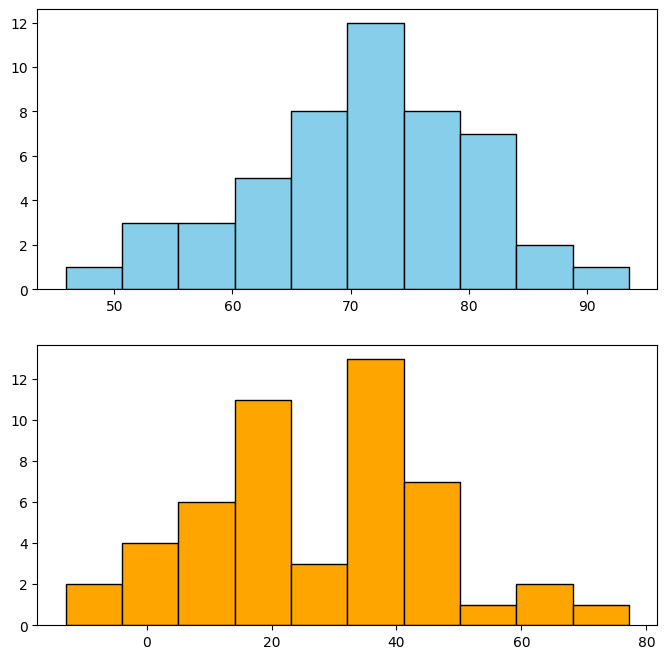

In [ ]:
fig, ax=plt.subplots(2,1,figsize=(8,8))
ax[0].hist(data['before'], bins=10, color="skyblue",edgecolor="black")
ax[1].hist(data['after'], bins=10, color="orange",edgecolor="black")
plt.show()

In [ ]:
#pearson correlation test
from scipy.stats import ttest_rel
ttest_rel(data['before'], data['after'])

TtestResult(statistic=14.79244961873719, pvalue=1.0578021768030814e-19, df=49)

In [ ]:
pvalue=1.0578021768030814e-19
statistic=14.79244961873719

In [ ]:
#effect size

!pip install researchpy

In [ ]:
from researchpy import ttest as rpttest
rpttest(data['before'], data['after'],equal_variances=True, paired=True)

/usr/local/lib/python3.10/dist-packages/researchpy/ttest.py:301: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'before' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  table.iloc[0,0] = group1_name
/usr/local/lib/python3.10/dist-packages/researchpy/ttest.py:419: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'Difference (before - after) = ' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  table2.iloc[0,0] = f"Difference ({group1_name} - {group2_name}) = "


(  Variable     N       Mean         SD        SE  95% Conf.   Interval
 0   before  50.0  70.889353   9.556688  1.351520  68.173372  73.605333
 1    after  50.0  27.926052  18.825748  2.662363  22.575834  33.276271
 2     diff  50.0  42.963301  20.537262  2.904407  37.126675  48.799926,
              Paired samples t-test  results
 0   Difference (before - after) =   42.9633
 1            Degrees of freedom =   49.0000
 2                             t =   14.7924
 3         Two side test p value =    0.0000
 4        Difference < 0 p value =    0.0000
 5        Difference > 0 p value =    1.0000
 6                     Cohen's d =    2.0920
 7                  Cohen's d_av =    3.0275
 8                     Hedge's g =    2.0759
 9                Glass's delta1 =    4.4956
 10             Point-Biserial r =    0.9039)

In [ ]:
d =    2.0920

In [ ]:
D=d*(2**0.5)
D

2.9585347724845152

In [ ]:
if D < 0.2:
  print("very weak") #sawilowskey
elif D < 0.5:
  print("weak") #cohen
elif D < 0.8:
  print("moderate") #cohen
elif D < 1.2:
  print("strong") #cohen
elif D < 2.0:
  print("very strong") #sawilowskey
else:
  print("extremely strong") #sawilowskey

extremely strong


There is a difference between before and after weights p<0.05 and the effect is strong cohen's d=2.95.